['sf-fire3-alpha03.gif', 'sf-fire3-alpha01.gif', 'fire2_PIL.gif', 'fire3_PIL.gif']


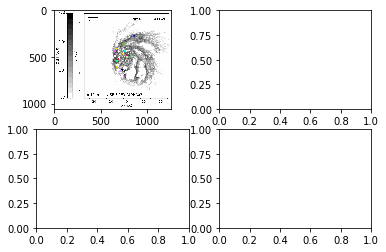

In [12]:
from PIL import Image
import glob  #use it if you want to read all certain file type
from matplotlib import pyplot as plt
imgs=glob.glob("*.gif")
import numpy as np
print(imgs)

fig1=plt.figure()
ax1=fig1.add_subplot(2,2,1)
ax2=fig1.add_subplot(2,2,2)
ax3=fig1.add_subplot(2,2,3)
ax4=fig1.add_subplot(2,2,4)
a=Image.open(imgs[0])
im = np.array(Image.open(imgs[0])).astype(np.float) / 255
ax1.imshow(a)

In [15]:
import imageio
import numpy as np    

#Create reader object for the gif
gif1 = imageio.get_reader('fire2_PIL.gif')
gif2 = imageio.get_reader('fire3_PIL.gif')

#If they don't have the same number of frame take the shorter
number_of_frames = min(gif1.get_length(), gif2.get_length()) 

#Create writer object
new_gif = imageio.get_writer('output.gif')

for frame_number in range(number_of_frames):
    img1 = gif1.get_next_data()
    img2 = gif2.get_next_data()
    #here is the magic
    new_image = np.hstack((img1, img2))
    new_gif.append_data(new_image)

gif1.close()
gif2.close()    
new_gif.close()

In [4]:
import sys
from PIL import Image



images = [Image.open(x) for x in ['fire2_PIL.gif', 'fire3_PIL.gif', 'sf-fire3-alpha01.gif']]
widths, heights = zip(*(i.size for i in images))
print(widths,heights)
print(images[0].size)
total_width = sum(widths)
max_height = max(heights)

new_im = Image.new('RGB', (total_width, max_height))

x_offset = 0
for im in images:
  new_im.paste(im, (x_offset,0))
  x_offset += im.size[0]

new_im.save('test.jpg')
new_im.show()

(1556, 1556, 1255) (1061, 1061, 1061)
(1556, 1061)
